Bernat Sort Rufat

MD005 Sistemas Basados en el Conocimiento

# Ejercicio 3.4: Aprendizaje Analógico - KNN (Python)

## Librerías 

In [1]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

## glass.arff

In [2]:
# cargamos el .arff file
glass = arff.loadarff('glass.arff')
# glass es una tupla que contiene dos elementos: un array numpy y una lista de tuplas
# primer elemento de la tupla (el array numpy) es el que nos interesa (glass[0])

In [3]:
# convertimos los datos a df
glass_df = pd.DataFrame(glass[0])

In [4]:
# 5 primeras filas del df
glass_df.head()

,RI,Na,Mg,Al,Si,'K',Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,b'build wind float'
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,b'vehic wind float'
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,b'build wind float'
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,b'tableware'
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,b'build wind non-float'


In [5]:
# nombres de las clases
glass_df['Type'].unique()

array([b'build wind float', b'vehic wind float', b'tableware',
       b'build wind non-float', b'headlamps', b'containers'], dtype=object)

In [6]:
# renombramos las clases para un mejor entendimiento 
glass_df['Type'].replace({b'build wind float': 'build_wind_float',
                          b'vehic wind float': 'vehic_wind_float',
                          b'tableware': 'tableware',
                          b'build wind non-float': 'build_wind_non_float',
                          b'headlamps': 'headlamps',
                          b'containers': 'containers'}, inplace = True)
glass_df['Type'].unique()

array(['build_wind_float', 'vehic_wind_float', 'tableware',
       'build_wind_non_float', 'headlamps', 'containers'], dtype=object)

In [7]:
# renombramos la columna 'K' por K
glass_df.rename(columns={"'K'": 'K'}, inplace=True)

In [8]:
# 5 primeras filas del df correctox
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,build_wind_float
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,vehic_wind_float
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,build_wind_float
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,build_wind_non_float


In [9]:
# info de las columnas del df
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


- Observamos que el df glass_df tiene 214 filas y 10 columnas. 
- Los tipos de datos de las columnas son float64 para 9 de las columnas y object para 1 columna. 
- Los nombres de las columnas son "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe" y "Type".
- Todas las columnas tienen 214 valores no nulos, lo que significa que no hay valores perdidos (missing values) en el df.



In [10]:
# estadísticas descriptivas 
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


El método df.describe() genera estadísticas descriptivas de un df.

Obtenemos el recuento, la media, la desviación estándar, el mínimo, el primer cuartil (25%), la mediana (50%), el tercer cuartil (75%) y el máximo de cada columna.

Esta información puede ser útil para comprender la distribución y el rango de valores de cada columna del df.

Podemos observar, por ejemplo, que para la columna Ba, el valor mínimo es 0, lo que significa que al menos algunas de las muestras no contienen bario. Los valores del primer cuartil (25%), de la mediana (50%) y del tercer cuartil (75%) también son 0, lo que sugiere que la mayoría de las muestras contienen muy poco o nada de bario. El valor máximo es 3.15, que es relativamente pequeño en comparación con los demás componentes químicos presentes en el vidrio.

Para la columna Fe, el valor mínimo es 0, lo que significa que al menos algunas muestras no contienen hierro. El primer cuartil (25%), la mediana (50%), el tercer cuartil (75%) y el valor máximo son 0, 0, 0.1 y 0.51 respectivamente. Esto sugiere que la mayoría de las muestras contienen muy poco o nada de hierro.

Parece ser que el bario y el hierro son componentes relativamente raros en las muestras de vidrio, ya que la mayoría de las muestras contienen poca cantidad. 

### Distribución de cada variable

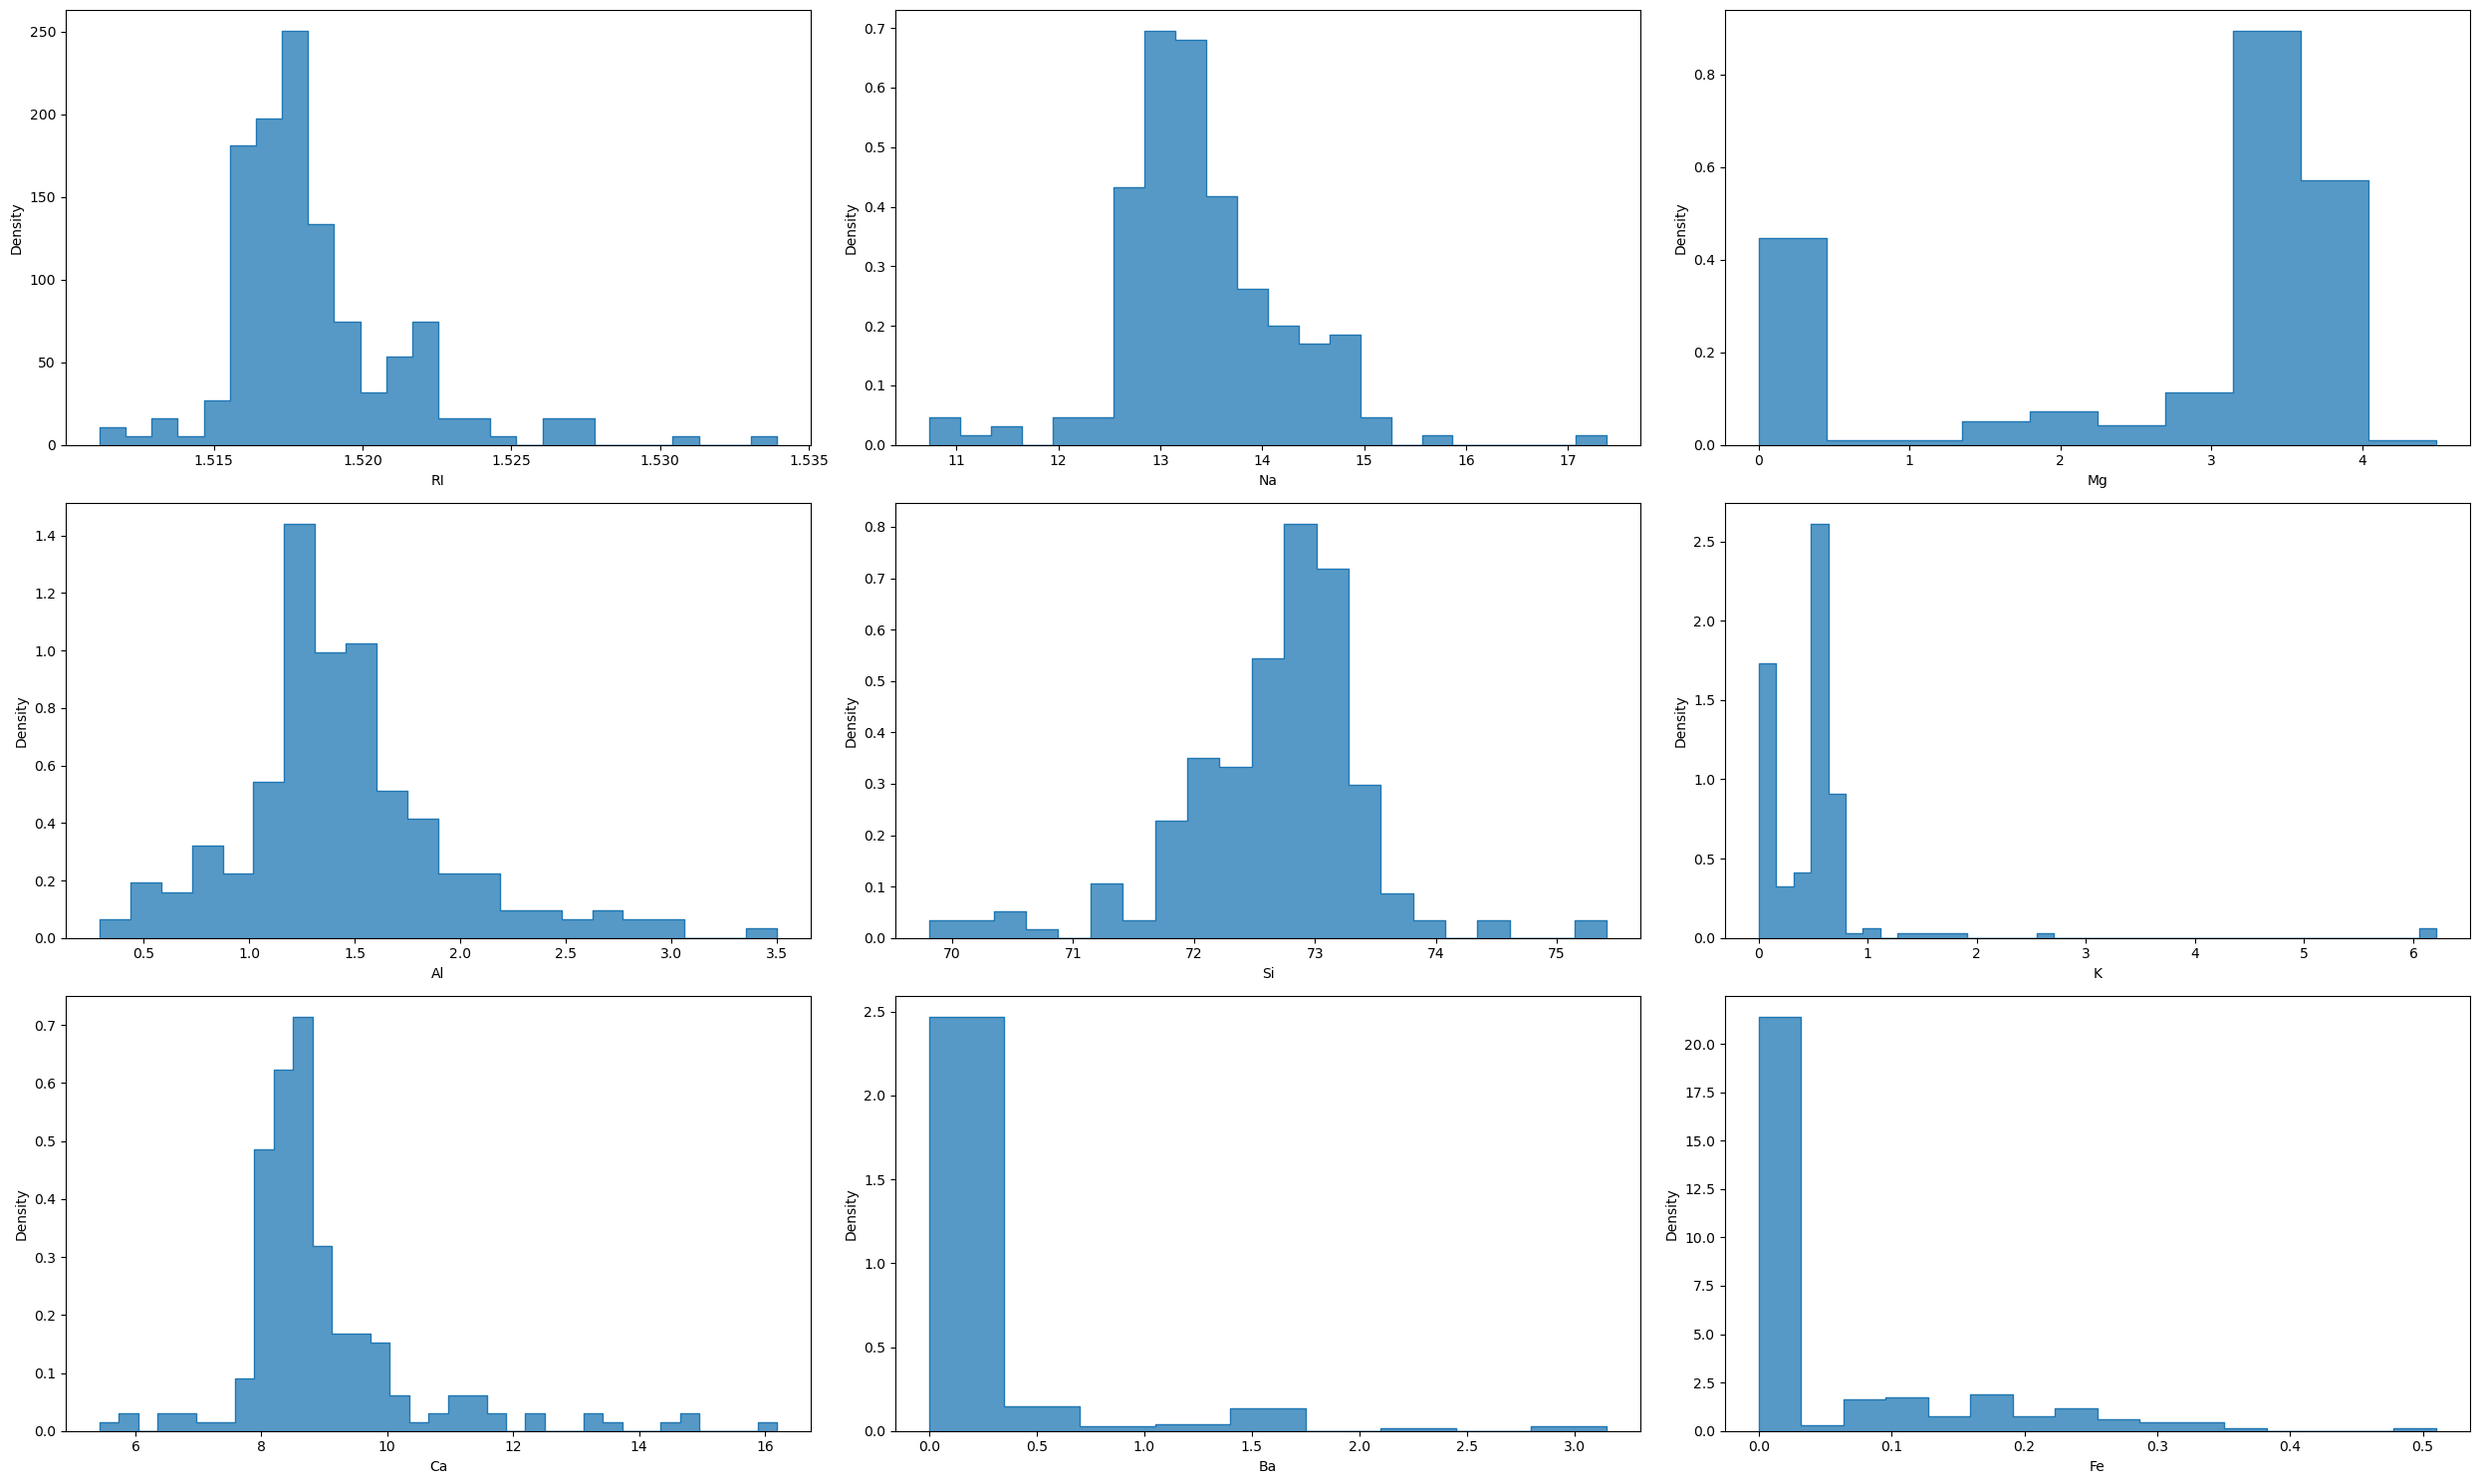

In [11]:
# creating a figure and a 3x3 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(25, 15))

# seaborn's histplot to plot histograms on the subplots
sns.histplot(data=glass_df, x='RI', element='step', stat='density', ax=axs[0, 0])
sns.histplot(data=glass_df, x='Na', element='step', stat='density', ax=axs[0, 1])
sns.histplot(data=glass_df, x='Mg', element='step', stat='density', ax=axs[0, 2])
sns.histplot(data=glass_df, x='Al', element='step', stat='density', ax=axs[1, 0])
sns.histplot(data=glass_df, x='Si', element='step', stat='density', ax=axs[1, 1])
sns.histplot(data=glass_df, x='K', element='step', stat='density', ax=axs[1, 2])
sns.histplot(data=glass_df, x='Ca', element='step', stat='density', ax=axs[2, 0])
sns.histplot(data=glass_df, x='Ba', element='step', stat='density', ax=axs[2, 1])
sns.histplot(data=glass_df, x='Fe', element='step', stat='density', ax=axs[2, 2])

# axis labels
axs[0, 0].set(xlabel='RI', ylabel='Density')
axs[0, 1].set(xlabel='Na', ylabel='Density')
axs[0, 2].set(xlabel='Mg', ylabel='Density')
axs[1, 0].set(xlabel='Al', ylabel='Density')
axs[1, 1].set(xlabel='Si', ylabel='Density')
axs[1, 2].set(xlabel='K', ylabel='Density')
axs[2, 0].set(xlabel='Ca', ylabel='Density')
axs[2, 1].set(xlabel='Ba', ylabel='Density')
axs[2, 2].set(xlabel='Fe', ylabel='Density')

# adjusting the spacing between the subplots
plt.tight_layout()

# showing the plot
plt.show()

- Observamos que algunas variables se distribuyen de manera normal (como RI, Na, Ca, Al y Si) mientras que otras presentan una asimetría positiva (por ejemplo, Ba, Fe y K) o negativa (por ejemplo, Mg). 

### Comprobación del desequilibrio de clases

In [11]:
# Checking data imbalance 
print(glass_df['Type'].value_counts()) # recuento de instancias de cada clase en el df

build_wind_non_float    76
build_wind_float        70
headlamps               29
vehic_wind_float        17
containers              13
tableware                9
Name: Type, dtype: int64


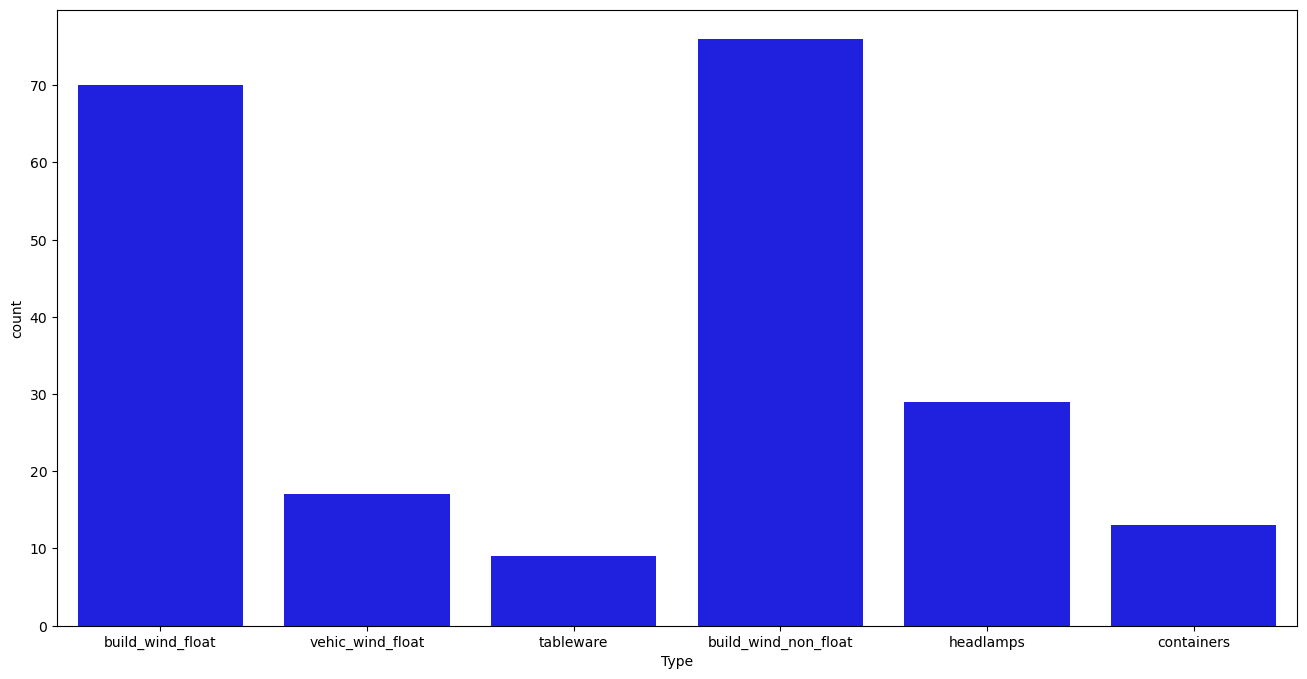

In [12]:
plt.figure(figsize=(16,8))
sns.countplot(x = glass_df['Type'], color = 'blue')
plt.show()

- Podemos observar que hay un desequilibrio de clases.
- Por ejemplo, vemos que la clase build_wind_non_float tiene 76 instancias, mientras que la clase tableware solo tiene 9 instancias. Esto significa que la clase build_wind_non_float tiene más de 8 veces el número de instancias que la clase tableware.
- Este desequilibrio en el número de instancias de cada clase puede plantear problemas a la hora de entrenar y evaluar modelos de Machine Learning. Por ejemplo, un modelo que siempre predice la clase mayoritaria es probable que logre una alta accuracy, pero no será útil en la práctica, ya que no está generalizando bien.

### Separar las variables independientes de la variable dependiente
- Separar en atributos (X) y etiquetas (y).
- Las columnas del conjunto de datos se pueden separar en feature columns (X) y target column (y).

In [14]:
# variables independientes (feature columns): las variables que se utilizan para predecir la variable objetivo (y)
X = glass_df.iloc[:, :-1].values
# variable dependiente (target column): en nuestro caso 'Type'
y = glass_df.iloc[:, -1].values

### Oversampling con SMOTE 

- Al tratarse de datos desequilibrados, nuestro modelo podría intentar ajustarse a la clase mayoritaria y proporcionar una predicción sesgada, además de ofrecer una accuracy engañosa.
- Por este motivo, realizaremos un procedimiento de sobremuestreo en las clases minoritarias con SMOTE.

In [15]:
SMOTE = SMOTE()
X_o, y_o = SMOTE.fit_resample(X,y)

In [16]:
# miramos el resultado de sobremuestro
y1 = pd.DataFrame(y_o)
y1.value_counts()

build_wind_float        76
build_wind_non_float    76
containers              76
headlamps               76
tableware               76
vehic_wind_float        76
dtype: int64

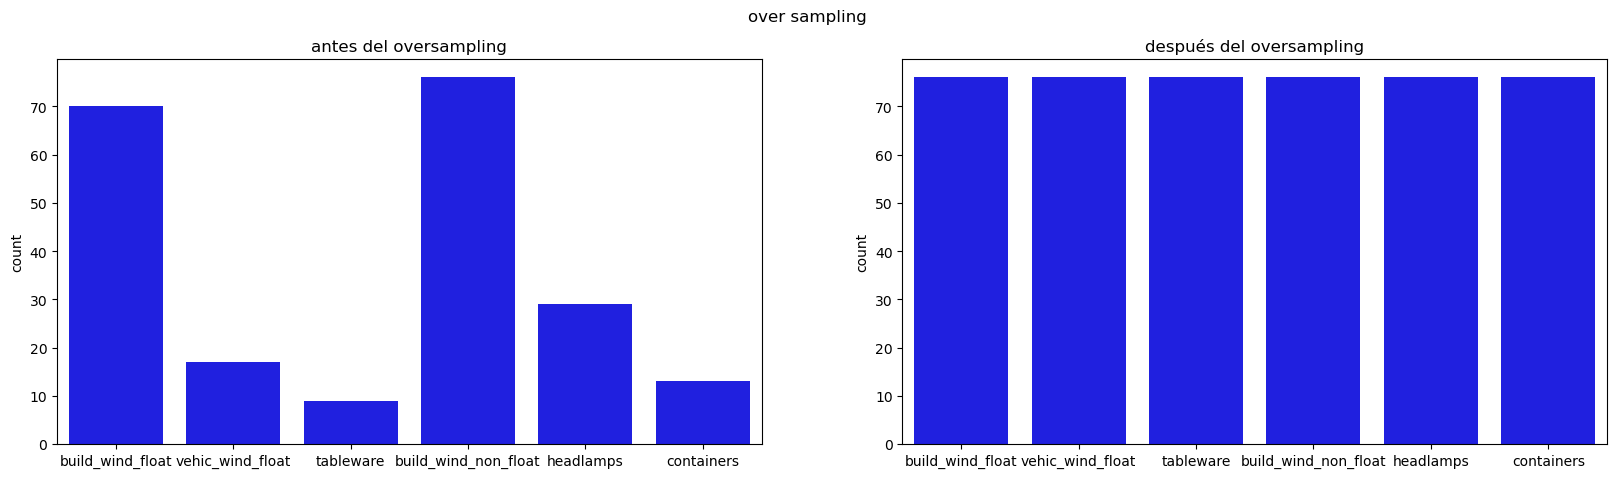

In [17]:
figure, axes = plt.subplots(1, 2, sharex=True,figsize=(20, 5))
figure.suptitle('over sampling')
axes[0].set_title('antes del oversampling')
axes[1].set_title('después del oversampling')
sns.countplot(x = y, color = 'blue',ax=axes[0])
sns.countplot(x = y_o, color = 'blue',ax=axes[1])
plt.show()

- Hemos incrementa de forma “sintética” los ejemplos de la clase minoritaria.
- Podemos observar que ya no hay un desequilibrio de clases, las clases están balanceadas.

### Escalar los atributos

- Escalamos los datos después de aplicar SMOTE ya que después de sobremuestrear los datos, la varianza de los datos aumentará artificialmente, por lo que el escalado puede ayudar a solucionar este problema. Además, tras el sobremuestreo, la distancia entre las features de la muestra sintética se acercará más a los datos originales, lo que puede ser beneficioso para algoritmos basados en la distancia como el KNN.

In [26]:
scaler = StandardScaler()
scaler.fit(X_o)

X_scaled = scaler.transform(X_o)

- Escalamos para que el algoritmo le dé la misma importancia a todos los datos.
- Algoritmos como KNN se basan en la distancia entre los puntos de datos, por lo que es importante que las features estén en la misma escala.
- El resultado es un nuevo conjunto de valores que tienen una distribución normal estándar (una distribución gaussiana con una media de 0 y una desviación estándar de 1).
- Ahora los tenemos todos dentro de un mismo rango o intervalo.
- La variable X_scaled contiene la versión estandarizada de la feature data almacenada en X_o.

### Algoritmo KNN

#### Para k=2

##### Preparación algoritmo KNN


In [27]:
knn_2 = KNeighborsClassifier(n_neighbors = 2)

# 10-Fold Stratified Cross-Validation 
skf = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
# random_state = None: el generador de números aleatorios utilizará un valor de semilla diferente 
    # cada vez que se ejecute el código, lo que resultará en un barajado diferente de los datos cada vez.
# shuffle=False: los datos se utilizan en el orden del conjunto de datos de entrada y no se barajan.


## Arrays para almacenar los resultados de cada iteración
cm_list = []
accu_list = []
prec_list = []
recall_list = []
f1_list = []

- Cuando random_state se establece en None y el parámetro shuffle es False, los datos siempre se dividen tal cual, sin barajar ni aleatorizar los datos. Esto significa que las observaciones se utilizan en el orden del conjunto de datos de entrada.
- Por tanto, en este caso, cuando random_state=None y shuffle=False, significa que no hay aleatorización al crear los pliegues (folds), los datos no se barajan y las observaciones se utilizan en el orden del conjunto de datos de entrada. El resultado será el mismo cada vez que se ejecute el código.
- Esto puede ser útil queremos comparar los resultados del modelo bajo diferentes condiciones, o si queremos asegurar la reproducibilidad de los resultados (queremos que utilice la misma división cada vez que se ejecute el código).
- No obstante, dejando de lado el ejercicio, es bueno que vaya cambiando, ya que si vemos que el cojunto de training y test varían mucho, no tenemos datos estables para el problema que queremos resolver.

##### Ejecución algoritmo KNN

- Se trata de un problema de clasificación multiclase.
- average='macro' calculará la métrica independientemente para cada clase y luego sacará la media. Las métricas macro promediadas darán el mismo peso a cada clase, independientemente del desequilibrio de clases.
    - En caso de sobremuestreo, el número de muestras en las diferentes clases no está equilibrado, por lo que el uso de micro se verá afectado por este desequilibrio. Macro, en cambio, dará el mismo peso a todas las clases, por lo que es más apropiado. En métodos de sobremuestreo como SMOTE, esto puede ayudar a mitigar el sesgo hacia la clase sobremuestreada y dar una visión más representativa del rendimiento del modelo. Por lo tanto, cuando se utilizan técnicas de sobremuestreo, se recomienda utilizar la opción average='macro' para calcular la *precision*, el *recall* y el *f1-score*.

In [28]:
n_iter = 0 ## Contador número de iteraciones del Cross-Validation
# Evaluamos el modelo usando cross-validation
for train_index, test_index in skf.split(X_scaled, y_o):
    n_iter +=1
    print('Iteración:',n_iter)
    
    ## División del dataset en entrenamiento y test
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_o[train_index], y_o[test_index]
    
    ## Entrenar el algoritmo
    knn_2.fit(X_train, y_train)
    score = knn_2.score(X_test, y_test)
    print("Fold accuracy: {:.2f}".format(score))
    
    ## Predicción del algoritmo
    y_pred = knn_2.predict(X_test)
    
    ## Métricas de evaluación
    cm = confusion_matrix(y_test, y_pred)
    accu = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    ## Guardar resultados métricas de evaluación de cada iteración
    cm_list.append(cm)
    accu_list.append(accu)
    prec_list.append(prec)
    recall_list.append(recall)
    f1_list.append(f1)
    
    ## Imprimir Métricas de evaluación en cada iteración
    print('Matriz de Confusión:\n',cm)
    print('')
    print('Accuracy:',accu)
    print('Precision:',prec)
    print('Recall:',recall)
    print('F1-Score:',f1)
    print('******\n')

Iteración: 1
Fold accuracy: 0.89
Matriz de Confusión:
 [[6 0 0 0 0 2]
 [2 6 0 0 0 0]
 [0 0 8 0 0 0]
 [1 0 0 6 0 0]
 [0 0 0 0 7 0]
 [0 0 0 0 0 8]]

Accuracy: 0.8913043478260869
Precision: 0.911111111111111
Recall: 0.8928571428571429
F1-Score: 0.8958318370083077
******

Iteración: 2
Fold accuracy: 0.91
Matriz de Confusión:
 [[7 0 0 0 0 1]
 [1 6 1 0 0 0]
 [0 0 8 0 0 0]
 [0 0 0 7 0 0]
 [0 0 0 0 7 0]
 [1 0 0 0 0 7]]

Accuracy: 0.9130434782608695
Precision: 0.923611111111111
Recall: 0.9166666666666666
F1-Score: 0.916141456582633
******

Iteración: 3
Fold accuracy: 0.83
Matriz de Confusión:
 [[6 0 0 0 0 2]
 [3 5 0 0 0 0]
 [0 0 8 0 0 0]
 [1 0 1 5 0 0]
 [0 0 0 0 8 0]
 [1 0 0 0 0 6]]

Accuracy: 0.8260869565217391
Precision: 0.8640572390572391
Recall: 0.8244047619047619
F1-Score: 0.8292199200867931
******

Iteración: 4
Fold accuracy: 0.91
Matriz de Confusión:
 [[8 0 0 0 0 0]
 [1 6 0 0 0 1]
 [0 0 8 0 0 0]
 [0 0 0 7 0 0]
 [0 0 0 0 8 0]
 [2 0 0 0 0 5]]

Accuracy: 0.9130434782608695
Precision: 0.9267

- Podemos observar el resultado de una 10-Fold Stratified Cross-Validation de un clasificador KNN con k=2. En este caso, el conjunto de datos se divide en 10 pliegues o folds y el clasificador KNN se entrena y evalúa en cada pliegue por separado. 

- Observamos que en todas las iteraciones, el clasificador parece tener una accuracy que oscila entre 0.82 y 0.96, mientras que los valores de precision, recall y F1-score se sitúan en torno a 0.9.

##### Evaluación final del algoritmo KNN


In [29]:
cm_mean = np.mean(cm_list, axis=0).astype(int)
accu_mean = np.mean(accu_list, axis=0)
prec_mean = np.mean(prec_list, axis=0)
recall_mean = np.mean(recall_list, axis=0)
f1_mean = np.mean(f1_list, axis=0)

print('Matriz de Confusión:\n',cm_mean)
print('')
print('Accuracy:',np.round(accu_mean,3))
print('Precision:',np.round(prec_mean,3))
print('Recall:',np.round(recall_mean,3))
print('F1-Score:',np.round(f1_mean,3))
print('******\n')

Matriz de Confusión:
 [[6 0 0 0 0 0]
 [2 4 0 0 0 0]
 [0 0 7 0 0 0]
 [0 0 0 7 0 0]
 [0 0 0 0 7 0]
 [0 0 0 0 0 6]]

Accuracy: 0.893
Precision: 0.907
Recall: 0.892
F1-Score: 0.89
******



- Obtenemos el resultado de promediar el rendimiento del clasificador en varias ejecuciones. La matriz de confusión, la accuracy, la precision, el recall y el F1-score se calculan para cada ejecución y, a continuación, se calculan los valores medios.

- La matriz de confusión media resultante muestra que la mayoría de las predicciones del clasificador son correctas, ya que la mayoría de las entradas están en la diagonal de la matriz (lo que corresponde a muestras correctamente clasificadas). No obstante hay alguna muestra mal clasificada. 

- Los valores medios de accuracy, precision, recall y puntuación F1 resultantes son respectivamente 0.893, 0.907, 0.892 y 0.89, lo que implica que, en promedio, el modelo funciona relativamente bien. Sin embargo, algunas clases tienen puntuaciones más bajas que otras, lo que indica que el modelo tiene más dificultades para clasificarlas. 

- En general, el clasificador tiene un buen rendimiento, pero aún con margen de mejora, especialmente para las clases con valores más bajos de precision, recall y F1-score.


#### Para k=4

##### Preparación algoritmo KNN


In [31]:
knn_4 = KNeighborsClassifier(n_neighbors = 4)

# 10-Fold Stratified Cross-Validation 
skf = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
# random_state = None: el generador de números aleatorios utilizará un valor de semilla diferente 
    # cada vez que se ejecute el código, lo que resultará en un barajado diferente de los datos cada vez.
# shuffle=False: los datos se utilizan en el orden del conjunto de datos de entrada y no se barajan.


## Arrays para almacenar los resultados de cada iteración
cm_list = []
accu_list = []
prec_list = []
recall_list = []
f1_list = []

##### Ejecución algoritmo KNN

In [32]:
n_iter = 0 ## Contador número de iteraciones del Cross-Validation

# Evaluamos el modelo usando cross-validation
for train_index, test_index in skf.split(X_scaled, y_o):
    n_iter +=1
    print('Iteración:',n_iter)
    
    ## División del dataset en entrenamiento y test
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_o[train_index], y_o[test_index]

    ## Entrenar el algoritmo
    knn_4.fit(X_train, y_train)
    score = knn_4.score(X_test, y_test)
    print("Fold accuracy: {:.2f}".format(score))
    
    ## Predicción del algoritmo
    y_pred = knn_4.predict(X_test)
    
    ## Métricas de evaluación
    cm = confusion_matrix(y_test, y_pred)
    accu = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    ## Guardar resultados métricas de evaluación de cada iteración
    cm_list.append(cm)
    accu_list.append(accu)
    prec_list.append(prec)
    recall_list.append(recall)
    f1_list.append(f1)
    
    ## Imprimir Métricas de evaluación en cada iteración
    print('Matriz de Confusión:\n',cm)
    print('')
    print('Accuracy:',accu)
    print('Precision:',prec)
    print('Recall:',recall)
    print('F1-Score:',f1)
    print('******\n')

Iteración: 1
Fold accuracy: 0.85
Matriz de Confusión:
 [[6 0 0 0 0 2]
 [3 5 0 0 0 0]
 [0 0 8 0 0 0]
 [1 0 0 6 0 0]
 [0 0 0 0 7 0]
 [1 0 0 0 0 7]]

Accuracy: 0.8478260869565217
Precision: 0.8872053872053871
Recall: 0.8511904761904763
F1-Score: 0.8579026752401364
******

Iteración: 2
Fold accuracy: 0.89
Matriz de Confusión:
 [[7 0 0 0 0 1]
 [2 5 1 0 0 0]
 [0 0 8 0 0 0]
 [0 0 0 7 0 0]
 [0 0 0 0 7 0]
 [1 0 0 0 0 7]]

Accuracy: 0.8913043478260869
Precision: 0.9106481481481481
Recall: 0.8958333333333334
F1-Score: 0.8938641695994637
******

Iteración: 3
Fold accuracy: 0.80
Matriz de Confusión:
 [[5 1 0 0 0 2]
 [2 5 0 0 0 1]
 [0 0 8 0 0 0]
 [1 0 1 5 0 0]
 [0 0 0 0 8 0]
 [1 0 0 0 0 6]]

Accuracy: 0.8043478260869565
Precision: 0.8240740740740741
Recall: 0.8035714285714285
F1-Score: 0.8045051353874882
******

Iteración: 4
Fold accuracy: 0.89
Matriz de Confusión:
 [[8 0 0 0 0 0]
 [1 5 0 0 0 2]
 [0 0 8 0 0 0]
 [0 0 0 7 0 0]
 [0 0 0 0 8 0]
 [2 0 0 0 0 5]]

Accuracy: 0.8913043478260869
Precision: 0.9

##### Evaluación final del algoritmo KNN


In [34]:
cm_mean = np.mean(cm_list, axis=0).astype(int)
accu_mean = np.mean(accu_list, axis=0)
prec_mean = np.mean(prec_list, axis=0)
recall_mean = np.mean(recall_list, axis=0)
f1_mean = np.mean(f1_list, axis=0)

print('Matriz de Confusión:\n',cm_mean)
print('')
print('Accuracy:',np.round(accu_mean,3))
print('Precision:',np.round(prec_mean,3))
print('Recall:',np.round(recall_mean,3))
print('F1-Score:',np.round(f1_mean,3))
print('******\n')

Matriz de Confusión:
 [[6 0 0 0 0 0]
 [2 4 0 0 0 0]
 [0 0 7 0 0 0]
 [0 0 0 7 0 0]
 [0 0 0 0 7 0]
 [0 0 0 0 0 6]]

Accuracy: 0.866
Precision: 0.884
Recall: 0.865
F1-Score: 0.859
******



- Para k=4:
    - Misma matriz de confusión que para k=2.
    - Observamos que los valores medios de la accuracy, precision, recall y F1-Score son ligeramente peores que para k=2. Por tanto, el rendimiento del modelo no es tan bueno como k=2. Esto puede deberse a que a medida que k aumenta, el modelo tiende a ser más sensible al ruido.

#### Para k=6

##### Preparación algoritmo KNN


In [35]:
knn_6 = KNeighborsClassifier(n_neighbors = 6)

# 10-Fold Stratified Cross-Validation 
skf = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
# random_state = None: el generador de números aleatorios utilizará un valor de semilla diferente 
    # cada vez que se ejecute el código, lo que resultará en un barajado diferente de los datos cada vez.
# shuffle=False: los datos se utilizan en el orden del conjunto de datos de entrada y no se barajan.


## Arrays para almacenar los resultados de cada iteración
cm_list = []
accu_list = []
prec_list = []
recall_list = []
f1_list = []

##### Ejecución algoritmo KNN

In [36]:
n_iter = 0 ## Contador número de iteraciones del Cross-Validation

# Evaluamos el modelo usando cross-validation
for train_index, test_index in skf.split(X_scaled, y_o):
    
    n_iter +=1
    print('Iteración:',n_iter)
    
    ## División del dataset en entrenamiento y test
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_o[train_index], y_o[test_index]
    
    ## Entrenar el algoritmo
    knn_6.fit(X_train, y_train)
    score = knn_6.score(X_test, y_test)
    print("Fold accuracy: {:.2f}".format(score))
    
    ## Predicción del algoritmo
    y_pred = knn_6.predict(X_test)
    
    ## Métricas de evaluación
    cm = confusion_matrix(y_test, y_pred)
    accu = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    ## Guardar resultados métricas de evaluación de cada iteración
    cm_list.append(cm)
    accu_list.append(accu)
    prec_list.append(prec)
    recall_list.append(recall)
    f1_list.append(f1)
    
    ## Imprimir Métricas de evaluación en cada iteración
    print('Matriz de Confusión:\n',cm)
    print('')
    print('Accuracy:',accu)
    print('Precision:',prec)
    print('Recall:',recall)
    print('F1-Score:',f1)
    print('******\n')

Iteración: 1
Fold accuracy: 0.83
Matriz de Confusión:
 [[5 1 0 0 0 2]
 [3 5 0 0 0 0]
 [0 0 8 0 0 0]
 [1 0 0 6 0 0]
 [0 0 0 0 7 0]
 [1 0 0 0 0 7]]

Accuracy: 0.8260869565217391
Precision: 0.851851851851852
Recall: 0.8303571428571429
F1-Score: 0.836074600780483
******

Iteración: 2
Fold accuracy: 0.83
Matriz de Confusión:
 [[5 2 0 0 0 1]
 [2 5 1 0 0 0]
 [0 0 8 0 0 0]
 [1 0 0 6 0 0]
 [0 0 0 0 7 0]
 [1 0 0 0 0 7]]

Accuracy: 0.8260869565217391
Precision: 0.8389550264550264
Recall: 0.8303571428571429
F1-Score: 0.8323592257415786
******

Iteración: 3
Fold accuracy: 0.83
Matriz de Confusión:
 [[5 1 0 0 0 2]
 [3 5 0 0 0 0]
 [0 0 8 0 0 0]
 [1 0 1 5 0 0]
 [0 0 0 0 8 0]
 [0 0 0 0 0 7]]

Accuracy: 0.8260869565217391
Precision: 0.8425925925925926
Recall: 0.8273809523809524
F1-Score: 0.8253384687208216
******

Iteración: 4
Fold accuracy: 0.91
Matriz de Confusión:
 [[8 0 0 0 0 0]
 [1 5 0 0 0 2]
 [0 0 8 0 0 0]
 [0 0 0 7 0 0]
 [0 0 0 0 8 0]
 [1 0 0 0 0 6]]

Accuracy: 0.9130434782608695
Precision: 0.924

##### Evaluación final del algoritmo KNN


In [37]:
cm_mean = np.mean(cm_list, axis=0).astype(int)
accu_mean = np.mean(accu_list, axis=0)
prec_mean = np.mean(prec_list, axis=0)
recall_mean = np.mean(recall_list, axis=0)
f1_mean = np.mean(f1_list, axis=0)

print('Matriz de Confusión:\n',cm_mean)
print('')
print('Accuracy:',np.round(accu_mean,3))
print('Precision:',np.round(prec_mean,3))
print('Recall:',np.round(recall_mean,3))
print('F1-Score:',np.round(f1_mean,3))
print('******\n')

Matriz de Confusión:
 [[5 1 0 0 0 1]
 [2 4 0 0 0 0]
 [0 0 7 0 0 0]
 [0 0 0 7 0 0]
 [0 0 0 0 7 0]
 [0 0 0 0 0 6]]

Accuracy: 0.846
Precision: 0.863
Recall: 0.845
F1-Score: 0.839
******



- Para k=6, observamos que los valores medios de la accuracy, precision, recall y F1-Score son ligeramente peores que para k=2 y k=4. Por tanto, el rendimiento del modelo ha disminuido respecto a k=2 y k=4. Esto puede deberse a que a medida que k aumenta, el modelo tiende a ser más sensible al ruido.

- k=6 no es un valor óptimo. 

**Conclusión**
- En conclusión, podemos ver que el rendimiento del clasificador disminuye a medida que aumenta el valor de k.  
- En general, el clasificador obtiene mejores resultados con un valor menor de k. 
    - Una posible razón de ello podría ser que el uso de un valor menor de k permite al clasificador identificar mejor las instancias más cercanas y similares a una instancia desconocida, lo que a su vez aumenta las posibilidades de clasificarla correctamente. 
    - Podría ser que a medida que k aumenta, el modelo tiende a infraajustarse (underfitting), es decir, es menos capaz de ajustarse a los datos, lo que se traduce en una disminución del rendimiento.
    - También es posible que el sobremuestreo con SMOTE haya influido en el rendimiento del clasificador KNN, provocando más ruido en el conjunto de datos, lo que podría explicar el mejor rendimiento de un valor k más bajo. Además, el sobremuestreo de muestras sintéticas podría ser menos informativo que las muestras reales, lo que también podría disminuir el rendimiento.


## iris.arff

In [2]:
# cargamos el .arff file
iris = arff.loadarff('iris.arff')
# iris es una tupla que contiene dos elementos: un array numpy y una lista de tuplas
# primer elemento de la tupla (el array numpy) es el que nos interesa (iris[0])

In [3]:
# convertimos los datos a df
iris_df = pd.DataFrame(iris[0])

In [4]:
# 5 primeras filas del df
iris_df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,b'Iris-setosa'
1,4.9,3.0,1.4,0.2,b'Iris-setosa'
2,4.7,3.2,1.3,0.2,b'Iris-setosa'
3,4.6,3.1,1.5,0.2,b'Iris-setosa'
4,5.0,3.6,1.4,0.2,b'Iris-setosa'


In [5]:
# nombres de las clases
iris_df['class'].unique()

array([b'Iris-setosa', b'Iris-versicolor', b'Iris-virginica'],
      dtype=object)

In [4]:
# renombramos las clases para un mejor entendimiento 
iris_df['class'].replace({b'Iris-setosa': 'iris_setosa',
                          b'Iris-versicolor': 'iris_versicolor',
                          b'Iris-virginica': 'iris_virginica'
                        }, inplace = True)
iris_df['class'].unique()

array(['iris_setosa', 'iris_versicolor', 'iris_virginica'], dtype=object)

In [5]:
# 5 primeras filas del df correcto
iris_df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,iris_setosa
1,4.9,3.0,1.4,0.2,iris_setosa
2,4.7,3.2,1.3,0.2,iris_setosa
3,4.6,3.1,1.5,0.2,iris_setosa
4,5.0,3.6,1.4,0.2,iris_setosa


In [8]:
# info de las columnas del df
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- Observamos que el iris_df tiene 150 filas y 5 columnas. 
- Los tipos de datos de las columnas son float64 para 4 de las columnas y object para la columna class. 
- Los nombres de las columnas son "sepallength", "sepalwidth", "petallength", "petalwidth", y "class".
- Todas las columnas tienen 150 valores no nulos, lo que significa que no hay valores perdidos (missing values) en el df.

In [9]:
# estadísticas descriptivas 
iris_df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- El método df.describe() genera estadísticas descriptivas de un df. Obtenemos el recuento, la media, la desviación estándar, el mínimo, el primer cuartil (25%), la mediana (50%), el tercer cuartil (75%) y el máximo de cada columna.

- Esta información puede ser útil para comprender la distribución y el rango de valores de cada columna del df.

- El iris datsaset contiene mediciones de 4 características (sepallength, sepalwidth, petallength y petalwidth) de 150 flores de Iris diferentes. Estas características se utilizan para distinguir entre 3 especies diferentes de Iris: Iris setosa, Iris virginica e Iris versicolor.
- Observando las estadísticas resumidas del conjunto de datos, podemos observar, por ejemplo, que los valores medios de las cuatro características están próximos a la mediana (50%), lo que indica que los datos son bastante simétricos. 

- En general, el iris_df parece bastante limpio y con un buen comportamiento, sin problemas importantes como falta de datos o valores atípicos. 


### Distribución de cada variable

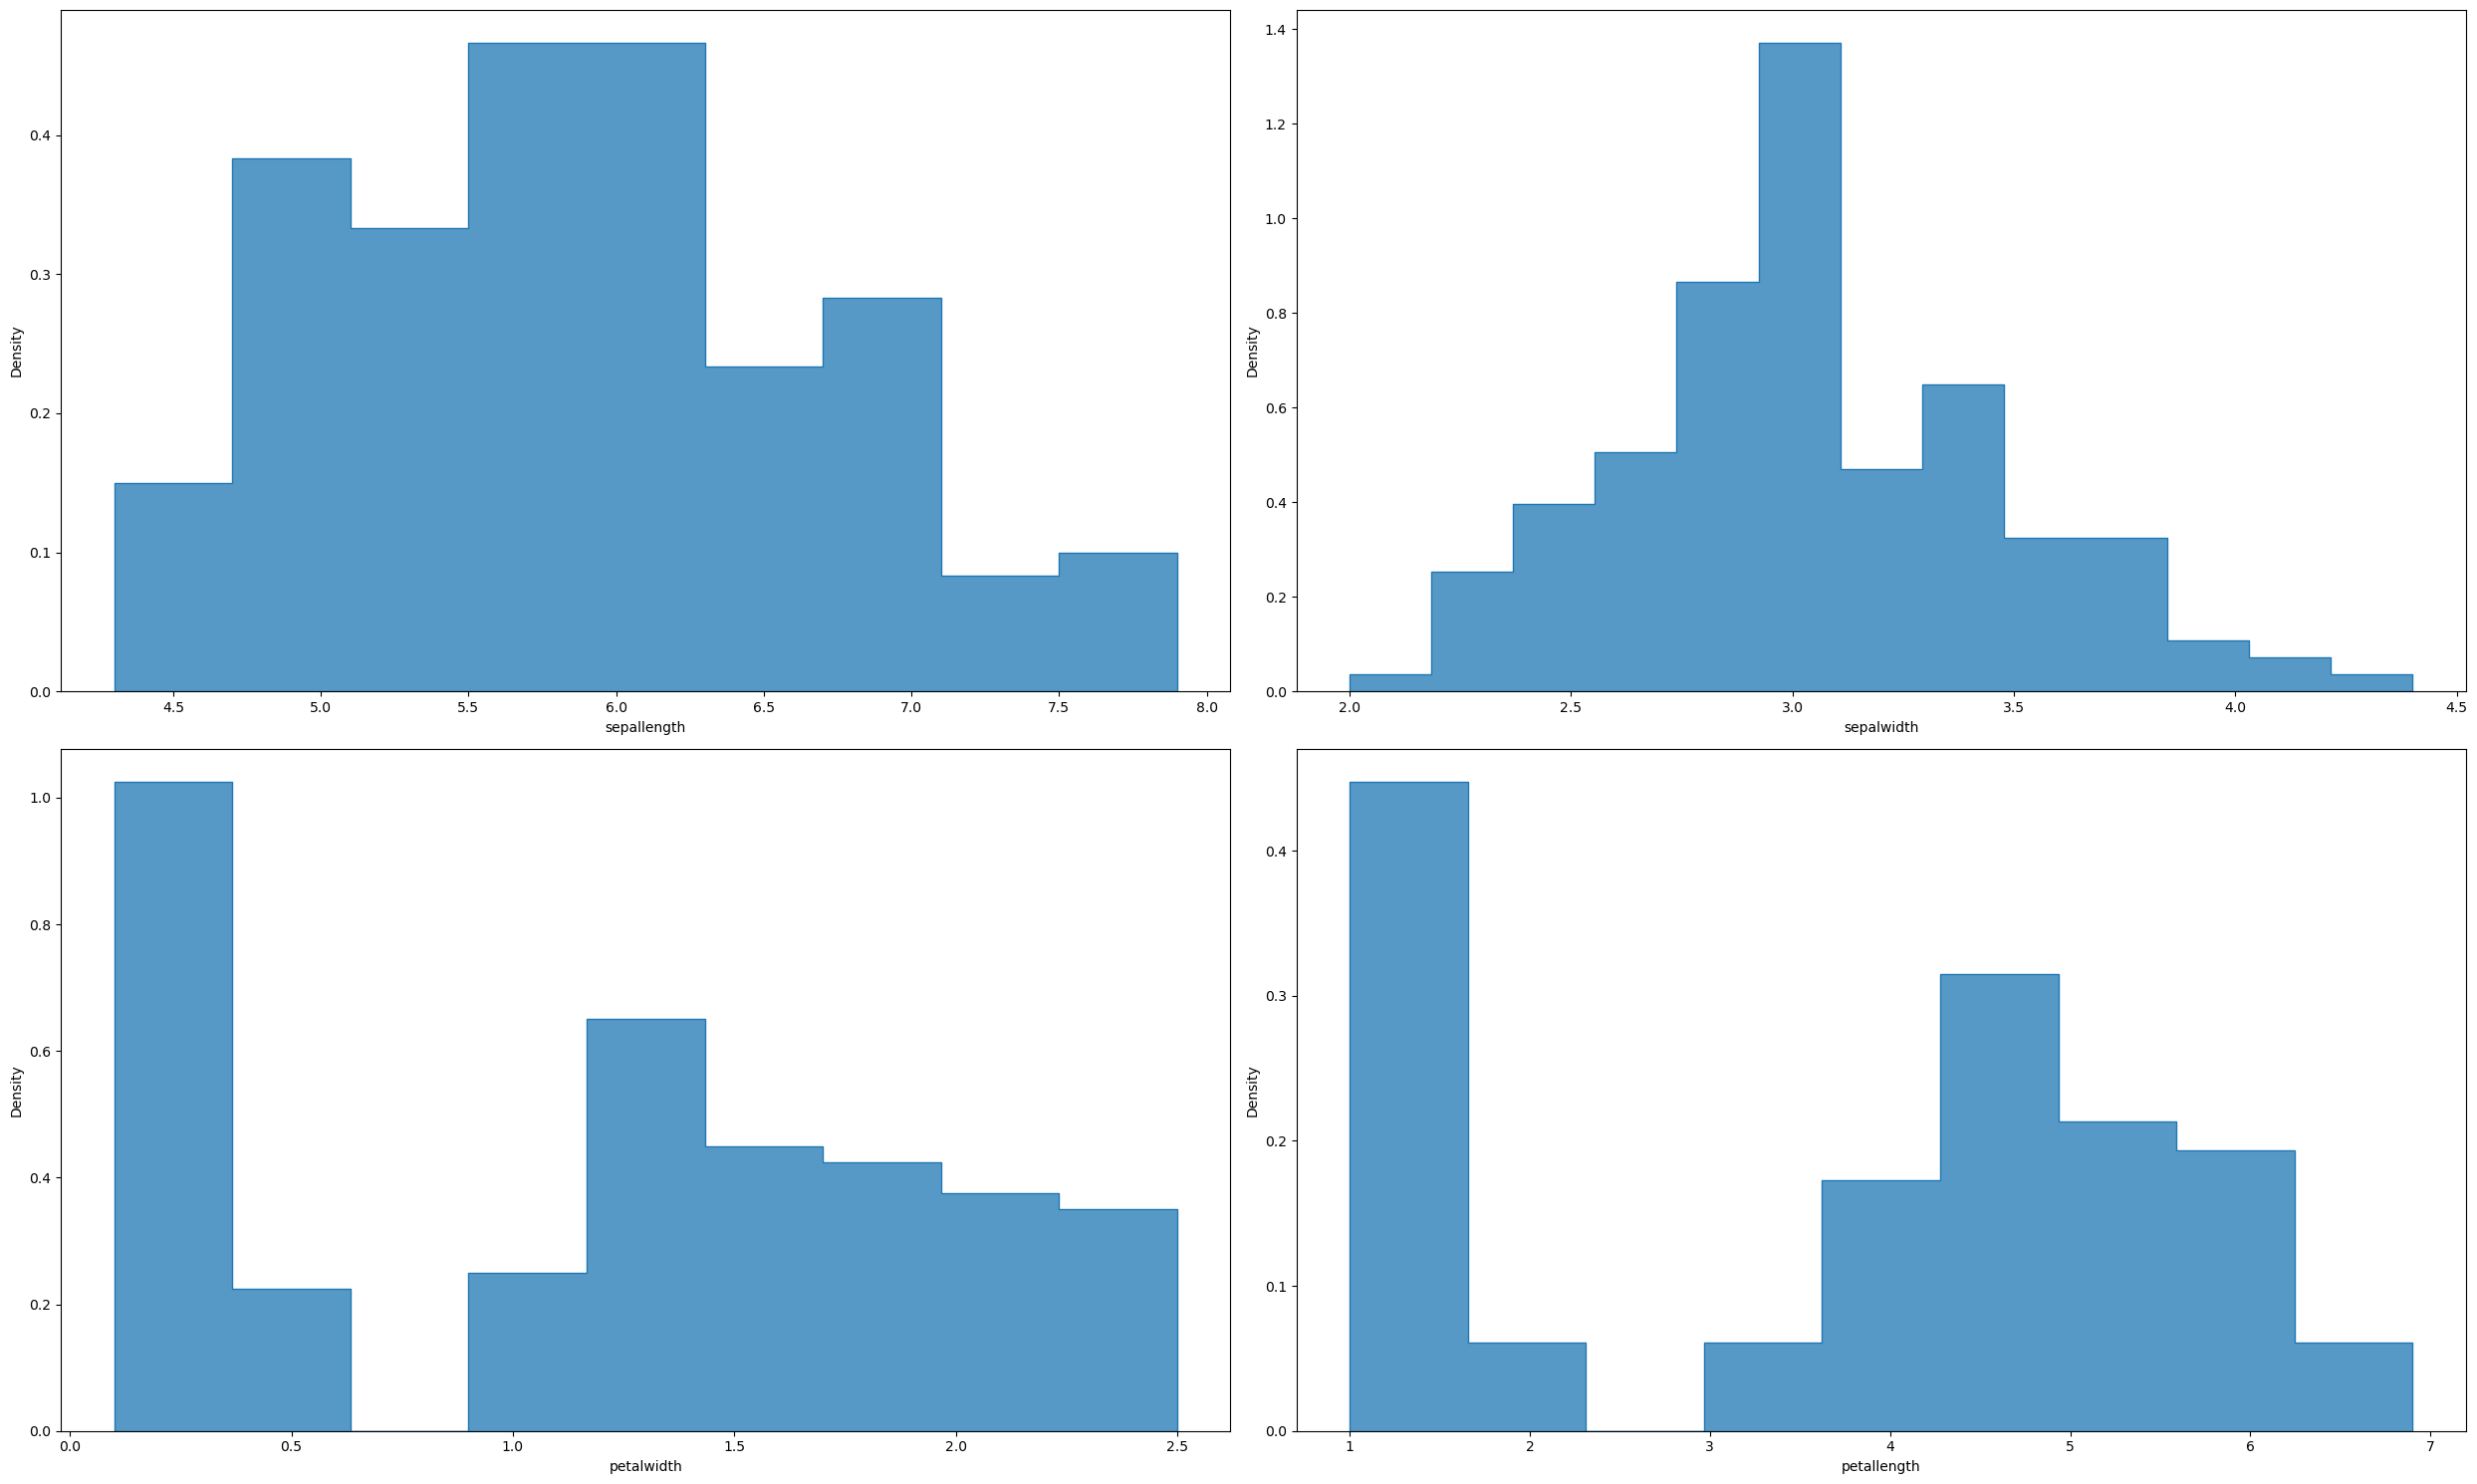

In [10]:
# creating a figure and a 3x3 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25, 15))

# seaborn's histplot to plot histograms on the subplots
sns.histplot(data=iris_df, x='sepallength', element='step', stat='density', ax=axs[0, 0])
sns.histplot(data=iris_df, x='sepalwidth', element='step', stat='density', ax=axs[0, 1])
sns.histplot(data=iris_df, x='petallength', element='step', stat='density', ax=axs[1, 1])
sns.histplot(data=iris_df, x='petalwidth', element='step', stat='density', ax=axs[1, 0])

# axis labels
axs[0, 0].set(xlabel='sepallength', ylabel='Density')
axs[0, 1].set(xlabel='sepalwidth', ylabel='Density')
axs[1, 1].set(xlabel='petallength', ylabel='Density')
axs[1, 0].set(xlabel='petalwidth', ylabel='Density')

# adjusting the spacing between the subplots
plt.tight_layout()

# showing the plot
plt.show()

- Observamos que sepallegnth y sepalwidth se distribuyen de manera más normal que petalwidth y petallength, que tienen una asimetría positiva. 


### Comprobación del desequilibrio de clases

In [6]:
# Checking data imbalance 
print(iris_df['class'].value_counts()) # recuento de instancias de cada clase en el df

iris_setosa        50
iris_versicolor    50
iris_virginica     50
Name: class, dtype: int64


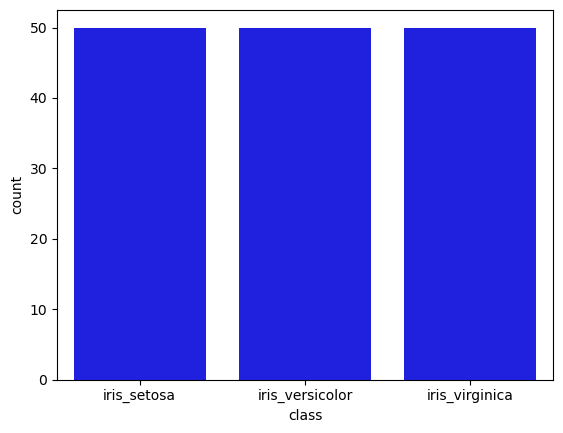

In [13]:
# plot del count
sns.countplot(x = iris_df['class'], color = 'blue')
plt.show()

- Podemos observar que el iris_df está bien equilibrado, con el mismo número de instancias (50) para cada una de las tres especies de Iris: Iris setosa, Iris versicolor e Iris virginica. 
- Esto significa que los datos se distribuyen uniformemente entre las tres clases y que no hay desequilibrio de clases (dataset balanceado).


### Separar las variables independientes de la variable dependiente
- Separar en atributos (X) y etiquetas (y).
- Las columnas del conjunto de datos se pueden separar en feature columns (X) y target column (y).

In [7]:
# variables independientes (feature columns): las variables que se utilizan para predecir la variable objetivo (y)
X_iris = iris_df.iloc[:, :-1].values
# variable dependiente (target column): en nuestro caso 'class'
y_iris = iris_df.iloc[:, -1].values

### Escalar los atributos

In [14]:
scaler = StandardScaler()
scaler.fit(X_iris)

X_scaled_iris = scaler.transform(X_iris)

- Escalamos para que el algoritmo le dé la misma importancia a todos los datos.
- Algoritmos como KNN se basan en la distancia entre los puntos de datos, por lo que es importante que las features estén en la misma escala.
- El resultado es un nuevo conjunto de valores que tienen una distribución normal estándar (una distribución gaussiana con una media de 0 y una desviación estándar de 1).

- Ahora los tenemos todos dentro de un mismo rango o intervalo.
- La variable X_scaled contiene la versión estandarizada de la feature data almacenada en X.


### Algoritmo KNN

#### Para k=2

##### Preparación algoritmo KNN


In [15]:
knn_2_i = KNeighborsClassifier(n_neighbors = 2)

# 10-Fold Stratified Cross-Validation 
skf_i = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
# random_state = None: el generador de números aleatorios utilizará un valor de semilla diferente 
    # cada vez que se ejecute el código, lo que resultará en un barajado diferente de los datos cada vez.
# shuffle=False: los datos se utilizan en el orden del conjunto de datos de entrada y no se barajan.


## Arrays para almacenar los resultados de cada iteración
cm_list_i = []
accu_list_i = []
prec_list_i = []
recall_list_i = []
f1_list_i = []

- Cuando random_state se establece en None y el parámetro shuffle es False, los datos siempre se dividen tal cual, sin barajar ni aleatorizar los datos. Esto significa que las observaciones se utilizan en el orden del conjunto de datos de entrada.
- Por tanto, en este caso, cuando random_state=None y shuffle=False, significa que no hay aleatorización al crear los pliegues (folds), los datos no se barajan y las observaciones se utilizan en el orden del conjunto de datos de entrada. El resultado será el mismo cada vez que se ejecute el código.
- Esto puede ser útil queremos comparar los resultados del modelo bajo diferentes condiciones, o si queremos asegurar la reproducibilidad de los resultados (queremos que utilice la misma división cada vez que se ejecute el código).
- No obstante, dejando de lado el ejercicio, es bueno que vaya cambiando, ya que si vemos que el cojunto de training y test varían mucho, no tenemos datos estables para el problema que queremos resolver.

##### Ejecución algoritmo KNN

- Se trata de un problema de clasificación multiclase.
- average='macro' calculará la métrica independientemente para cada clase y luego sacará la media. Las métricas macro promediadas darán el mismo peso a cada clase, independientemente del desequilibrio de clases.
- Dado que el conjunto de datos Iris está equilibrado, tanto micro como macro darán resultados similares. En este caso usaremos la métrica macro-promediada. 

In [20]:
n_iter_i = 0 ## Contador número de iteraciones del Cross-Validation

# Evaluamos el modelo usando cross-validation
for train_index_i, test_index_i in skf_i.split(X_scaled_iris, y_iris):
    
    n_iter_i +=1
    print('Iteración:',n_iter_i)
    
    ## División del dataset en entrenamiento y test
    X_train_i, X_test_i = X_scaled_iris[train_index_i], X_scaled_iris[test_index_i]
    y_train_i, y_test_i = y_iris[train_index_i], y_iris[test_index_i]
    
    ## Entrenar el algoritmo
    knn_2_i.fit(X_train_i, y_train_i)
    score_i = knn_2_i.score(X_test_i, y_test_i)
    print("Fold accuracy: {:.2f}".format(score_i))
    
    ## Predicción del algoritmo
    y_pred_i = knn_2_i.predict(X_test_i)
    
    ## Métricas de evaluación
    cm_i = confusion_matrix(y_test_i, y_pred_i)
    accu_i = accuracy_score(y_test_i, y_pred_i)
    prec_i = precision_score(y_test_i, y_pred_i, average='macro')
    recall_i = recall_score(y_test_i, y_pred_i, average='macro')
    f1_i = f1_score(y_test_i, y_pred_i, average='macro')
    
    ## Guardar resultados métricas de evaluación de cada iteración
    cm_list_i.append(cm_i)
    accu_list_i.append(accu_i)
    prec_list_i.append(prec_i)
    recall_list_i.append(recall_i)
    f1_list_i.append(f1_i)
    
    ## Imprimir Métricas de evaluación en cada iteración
    print('Matriz de Confusión:\n',cm_i)
    print('')
    print('Accuracy:',accu_i)
    print('Precision:',prec_i)
    print('Recall:',recall_i)
    print('F1-Score:',f1_i)
    print('******\n')

Iteración: 1
Fold accuracy: 1.00
Matriz de Confusión:
 [[5 0 0]
 [0 5 0]
 [0 0 5]]

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
******

Iteración: 2
Fold accuracy: 0.93
Matriz de Confusión:
 [[5 0 0]
 [0 5 0]
 [0 1 4]]

Accuracy: 0.9333333333333333
Precision: 0.9444444444444445
Recall: 0.9333333333333332
F1-Score: 0.9326599326599326
******

Iteración: 3
Fold accuracy: 1.00
Matriz de Confusión:
 [[5 0 0]
 [0 5 0]
 [0 0 5]]

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
******

Iteración: 4
Fold accuracy: 0.93
Matriz de Confusión:
 [[5 0 0]
 [0 5 0]
 [0 1 4]]

Accuracy: 0.9333333333333333
Precision: 0.9444444444444445
Recall: 0.9333333333333332
F1-Score: 0.9326599326599326
******

Iteración: 5
Fold accuracy: 0.87
Matriz de Confusión:
 [[5 0 0]
 [0 3 2]
 [0 0 5]]

Accuracy: 0.8666666666666667
Precision: 0.9047619047619048
Recall: 0.8666666666666667
F1-Score: 0.861111111111111
******

Iteración: 6
Fold accuracy: 1.00
Matriz de Confusión:
 [[5 0 0]
 [0 5 0]
 [0 0 5]]

Ac

- Podemos observar el resultado de una 10-Fold Stratified Cross-Validation de un clasificador KNN con k=2. En este caso, el conjunto de datos se divide en 10 pliegues o folds y el clasificador KNN se entrena y evalúa en cada pliegue por separado. 

- La accuracy de todas las iteraciones se sitúa entre 0.87 y 1, lo que sugiere que el clasificador KNN es capaz de predecir correctamente la clase de la mayoría de las muestras del dataset.

- La precision, el recall y la F1-score también son elevadas, y en el peor de los casos se sitúan en torno a 0.8. Estas tres métricas indican que el clasificador es capaz de clasificar correctamente un alto porcentaje de los casos positivos y que no clasifica erróneamente como positivos muchos de los casos negativos.

- Las matrices de confusión muestran que el clasificador funcionó bien en iris setosa. Sin embargo, en algunas iteraciones, el clasificador clasifica erróneamente iris versicolor e iris virginica. Una posible razón podría ser que estas dos clases son más difíciles de separar. 

##### Evaluación final del algoritmo KNN


In [18]:
cm_mean_i = np.mean(cm_list_i, axis=0).astype(int)
accu_mean_i = np.mean(accu_list_i, axis=0)
prec_mean_i = np.mean(prec_list_i, axis=0)
recall_mean_i = np.mean(recall_list_i, axis=0)
f1_mean_i = np.mean(f1_list_i, axis=0)

print('Matriz de Confusión:\n',cm_mean_i)
print('')
print('Accuracy:',np.round(accu_mean_i,3))
print('Precision:',np.round(prec_mean_i,3))
print('Recall:',np.round(recall_mean_i,3))
print('F1-Score:',np.round(f1_mean_i,3))
print('******\n')

Matriz de Confusión:
 [[5 0 0]
 [0 4 0]
 [0 0 4]]

Accuracy: 0.953
Precision: 0.96
Recall: 0.953
F1-Score: 0.952
******



- Obtenemos el resultado de promediar el rendimiento del clasificador en varias ejecuciones. La matriz de confusión, la accuracy, la precision, el recall y el F1-score se calculan para cada ejecución y, a continuación, se calculan los valores medios.

- La matriz de confusión muestra que el clasificador funciona bien en la mayoría de los casos. 

- Las métricas generales de rendimiento son superiores a 0.95, lo que sugiere que el clasificador es capaz de predecir la clase correcta para un gran porcentaje de las muestras.

- El modelo tiene una accuracy del 0.953, lo que sugiere que el modelo clasificó correctamente el 95.3% de las muestras. 

- La precisión del modelo es de 0.96, lo que significa que de todas las muestras clasificadas como positivas, el 96% son verdaderos positivos.

- El recall del modelo es de 0.953, lo significa que de todas las muestras del iris_df, el modelo fue capaz de identificar correctamente el 95.3% de ellas.

- El F1-score de 0.952 indica un equilibrio entre la precision y el recall del modelo.

#### Para k=4

##### Preparación algoritmo KNN


In [27]:
knn_4_i = KNeighborsClassifier(n_neighbors = 4)

# 10-Fold Stratified Cross-Validation 
skf_i = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
# random_state = None: el generador de números aleatorios utilizará un valor de semilla diferente 
    # cada vez que se ejecute el código, lo que resultará en un barajado diferente de los datos cada vez.
# shuffle=False: los datos se utilizan en el orden del conjunto de datos de entrada y no se barajan.


## Arrays para almacenar los resultados de cada iteración
cm_list_i = []
accu_list_i = []
prec_list_i = []
recall_list_i = []
f1_list_i = []

##### Ejecución algoritmo KNN

In [28]:
n_iter_i = 0 ## Contador número de iteraciones del Cross-Validation

# Evaluamos el modelo usando cross-validation
for train_index_i, test_index_i in skf_i.split(X_scaled_iris, y_iris):
    
    n_iter_i +=1
    print('Iteración:',n_iter_i)
    
    ## División del dataset en entrenamiento y test
    X_train_i, X_test_i = X_scaled_iris[train_index_i], X_scaled_iris[test_index_i]
    y_train_i, y_test_i = y_iris[train_index_i], y_iris[test_index_i]

    ## Entrenar el algoritmo
    knn_4_i.fit(X_train_i, y_train_i)
    score_i = knn_4_i.score(X_test_i, y_test_i)
    print("Fold accuracy: {:.2f}".format(score_i))
    
    ## Predicción del algoritmo
    y_pred_i = knn_4_i.predict(X_test_i)
    
    ## Métricas de evaluación
    cm_i = confusion_matrix(y_test_i, y_pred_i)
    accu_i = accuracy_score(y_test_i, y_pred_i)
    prec_i = precision_score(y_test_i, y_pred_i, average='macro')
    recall_i = recall_score(y_test_i, y_pred_i, average='macro')
    f1_i = f1_score(y_test_i, y_pred_i, average='macro')
    
    ## Guardar resultados métricas de evaluación de cada iteración
    cm_list_i.append(cm_i)
    accu_list_i.append(accu_i)
    prec_list_i.append(prec_i)
    recall_list_i.append(recall_i)
    f1_list_i.append(f1_i)
    
    ## Imprimir Métricas de evaluación en cada iteración
    print('Matriz de Confusión:\n',cm_i)
    print('')
    print('Accuracy:',accu_i)
    print('Precision:',prec_i)
    print('Recall:',recall_i)
    print('F1-Score:',f1_i)
    print('******\n')

Iteración: 1
Fold accuracy: 1.00
Matriz de Confusión:
 [[5 0 0]
 [0 5 0]
 [0 0 5]]

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
******

Iteración: 2
Fold accuracy: 0.93
Matriz de Confusión:
 [[5 0 0]
 [0 5 0]
 [0 1 4]]

Accuracy: 0.9333333333333333
Precision: 0.9444444444444445
Recall: 0.9333333333333332
F1-Score: 0.9326599326599326
******

Iteración: 3
Fold accuracy: 1.00
Matriz de Confusión:
 [[5 0 0]
 [0 5 0]
 [0 0 5]]

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
******

Iteración: 4
Fold accuracy: 0.93
Matriz de Confusión:
 [[5 0 0]
 [0 5 0]
 [0 1 4]]

Accuracy: 0.9333333333333333
Precision: 0.9444444444444445
Recall: 0.9333333333333332
F1-Score: 0.9326599326599326
******

Iteración: 5
Fold accuracy: 0.93
Matriz de Confusión:
 [[5 0 0]
 [0 4 1]
 [0 0 5]]

Accuracy: 0.9333333333333333
Precision: 0.9444444444444445
Recall: 0.9333333333333332
F1-Score: 0.9326599326599326
******

Iteración: 6
Fold accuracy: 1.00
Matriz de Confusión:
 [[5 0 0]
 [0 5 0]
 [0 0 5]]

A

##### Evaluación final del algoritmo KNN


In [29]:
cm_mean_i = np.mean(cm_list_i, axis=0).astype(int)
accu_mean_i = np.mean(accu_list_i, axis=0)
prec_mean_i = np.mean(prec_list_i, axis=0)
recall_mean_i = np.mean(recall_list_i, axis=0)
f1_mean_i = np.mean(f1_list_i, axis=0)

print('Matriz de Confusión:\n',cm_mean_i)
print('')
print('Accuracy:',np.round(accu_mean_i,3))
print('Precision:',np.round(prec_mean_i,3))
print('Recall:',np.round(recall_mean_i,3))
print('F1-Score:',np.round(f1_mean_i,3))
print('******\n')

Matriz de Confusión:
 [[5 0 0]
 [0 4 0]
 [0 0 4]]

Accuracy: 0.947
Precision: 0.953
Recall: 0.947
F1-Score: 0.946
******



- Para k=4:
    - Misma matriz de confusión que para k=2. 
    - Observamos que los valores medios de la accuracy, precision, recall y F1-Score son ligeramente peores que para k=2. Por tanto, el rendimiento del modelo no es tan bueno como k=2. Esto puede deberse a que a medida que k aumenta, el modelo tiende a ser más sensible al ruido.



#### Para k=6

##### Preparación algoritmo KNN


In [31]:
knn_6_i = KNeighborsClassifier(n_neighbors = 6)

# 10-Fold Stratified Cross-Validation 
skf_i = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
# random_state = None: el generador de números aleatorios utilizará un valor de semilla diferente 
    # cada vez que se ejecute el código, lo que resultará en un barajado diferente de los datos cada vez.
# shuffle=False: los datos se utilizan en el orden del conjunto de datos de entrada y no se barajan.


## Arrays para almacenar los resultados de cada iteración
cm_list_i = []
accu_list_i = []
prec_list_i = []
recall_list_i = []
f1_list_i = []

##### Ejecución algoritmo KNN

In [32]:
n_iter_i = 0 ## Contador número de iteraciones del Cross-Validation

# Evaluamos el modelo usando cross-validation
for train_index_i, test_index_i in skf_i.split(X_scaled_iris, y_iris):
    
    n_iter_i +=1
    print('Iteración:',n_iter_i)
    
    ## División del dataset en entrenamiento y test
    X_train_i, X_test_i = X_scaled_iris[train_index_i], X_scaled_iris[test_index_i]
    y_train_i, y_test_i = y_iris[train_index_i], y_iris[test_index_i]

    ## Entrenar el algoritmo
    knn_6_i.fit(X_train_i, y_train_i)
    score_i = knn_6_i.score(X_test_i, y_test_i)
    print("Fold accuracy: {:.2f}".format(score_i))
    
    ## Predicción del algoritmo
    y_pred_i = knn_6_i.predict(X_test_i)
    
    ## Métricas de evaluación
    cm_i = confusion_matrix(y_test_i, y_pred_i)
    accu_i = accuracy_score(y_test_i, y_pred_i)
    prec_i = precision_score(y_test_i, y_pred_i, average='macro')
    recall_i = recall_score(y_test_i, y_pred_i, average='macro')
    f1_i = f1_score(y_test_i, y_pred_i, average='macro')
    
    ## Guardar resultados métricas de evaluación de cada iteración
    cm_list_i.append(cm_i)
    accu_list_i.append(accu_i)
    prec_list_i.append(prec_i)
    recall_list_i.append(recall_i)
    f1_list_i.append(f1_i)
    
    ## Imprimir Métricas de evaluación en cada iteración
    print('Matriz de Confusión:\n',cm_i)
    print('')
    print('Accuracy:',accu_i)
    print('Precision:',prec_i)
    print('Recall:',recall_i)
    print('F1-Score:',f1_i)
    print('******\n')

Iteración: 1
Fold accuracy: 1.00
Matriz de Confusión:
 [[5 0 0]
 [0 5 0]
 [0 0 5]]

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
******

Iteración: 2
Fold accuracy: 0.93
Matriz de Confusión:
 [[5 0 0]
 [0 5 0]
 [0 1 4]]

Accuracy: 0.9333333333333333
Precision: 0.9444444444444445
Recall: 0.9333333333333332
F1-Score: 0.9326599326599326
******

Iteración: 3
Fold accuracy: 1.00
Matriz de Confusión:
 [[5 0 0]
 [0 5 0]
 [0 0 5]]

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
******

Iteración: 4
Fold accuracy: 0.93
Matriz de Confusión:
 [[5 0 0]
 [0 5 0]
 [0 1 4]]

Accuracy: 0.9333333333333333
Precision: 0.9444444444444445
Recall: 0.9333333333333332
F1-Score: 0.9326599326599326
******

Iteración: 5
Fold accuracy: 1.00
Matriz de Confusión:
 [[5 0 0]
 [0 5 0]
 [0 0 5]]

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
******

Iteración: 6
Fold accuracy: 1.00
Matriz de Confusión:
 [[5 0 0]
 [0 5 0]
 [0 0 5]]

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
******

##### Evaluación final del algoritmo KNN


In [33]:
cm_mean_i = np.mean(cm_list_i, axis=0).astype(int)
accu_mean_i = np.mean(accu_list_i, axis=0)
prec_mean_i = np.mean(prec_list_i, axis=0)
recall_mean_i = np.mean(recall_list_i, axis=0)
f1_mean_i = np.mean(f1_list_i, axis=0)

print('Matriz de Confusión:\n',cm_mean_i)
print('')
print('Accuracy:',np.round(accu_mean_i,3))
print('Precision:',np.round(prec_mean_i,3))
print('Recall:',np.round(recall_mean_i,3))
print('F1-Score:',np.round(f1_mean_i,3))
print('******\n')

Matriz de Confusión:
 [[5 0 0]
 [0 4 0]
 [0 0 4]]

Accuracy: 0.967
Precision: 0.97
Recall: 0.967
F1-Score: 0.966
******



- Para k=6:
    - Misma matriz de confusión que para k=2 y k=4.
    - Observamos que los valores medios de la accuracy, precision, recall y F1-Score son ligeramente mejores que para k=2 y k=4. Por tanto, el rendimiento del modelo es mejor que para k=2 y k=4. 

Conclusiones: 

- Para k=2, el clasificador alcanzó una accuracy de 0.953, lo que significa que clasificó correctamente el 95,3% de las muestras del conjunto de datos. La precision, el recall y el F1-score se sitúan en torno a 0.95.

- Para k=4, la accuracy del clasificador descendió ligeramente a 0.947; la precision, el recall y el F1-score se sitúan en torno a 0.95.

- Para k=6, la precisión del clasificador mejoró hasta 0.967; la precision, el recall y el F1-score  se sitúan en torno a 0.97.

- En conclusión, con k=6 el modelo funciona mejor según las métricas anteriormente mencionadas debido al mayor número de vecinos considerados. Además, como los valores de k=2,4,6 están próximos entre sí, la diferencia de rendimiento también puede deberse a la variación aleatoria y al ruido de los datos. Por lo tanto, sería interesante probar con valores de k menos próximos entre sí.



